# Assignment 1: Training a network with PyTorch

In this assignment, we will implement a simple neural network with PyTorch. The goal of this assignment is for you to see how a typical neural network training pipeline can be implemented very simply using existing frameworks. In this assignment we will stick to the bare-bones PyTorch, just so that you get a more hands-on experience. There are three main components to this assignment:

- **Input pipeline**: A boring but necessary part of the pipeline that you typically have to implement for each dataset. In this assignment we will see how we can load and process our data into the the typical [PyTorch Dataset](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html), so that they can be used easily by the PyTorch Dataloader. This allows us to very easily perform multiprocessing, and even distributed training.

- **Model**: In our later assignments we will see how we can compose cutting-edge models to process data. But for this assignment, we will stick to the very basics -- a fully connected network.

- **Training and evaluation pipeline**: Another critical component. Unless this part is done properly, you won't be able to see how you are actually doing.

### What to do?
Walk through this notebook and edit so that it becomes your report. You will need to implement and complete the other Python files that are provided alongside this notebook. See each section below and the corresponding python files for more details. When you are submitting, simply zip your notebook and your python files all together and upload it to canvas. Importantly, do **NOT** include the data files, nor hidden ipython checkpoints in your zip file -- it'll make our hard drives expload.

### Due date
Deadline: 25/09/2023, 11:59 pm

## Input pipeline (30pts)
For this assignment, and our future assignments, we will use a very particular version of the MNIST dataset -- a point cloud version of MNIST (**MNISTPTS**). To create MNISTPTS, what we did was to look at MNIST images and find white pixels, and store their coordinates; see `utils/mnist_helper.py` for details. The scripts for creating this MNISTPTS dataset is already provided, and you are to complete the script `get_dataloader.py` according to the specifications within the Python file so that it runs as below.

In [1]:
# Preparing the dataset MNISTPTS.
import numpy as np
from utils.mnist_helper import load_mnist, load_mnistpts, dump_mnistpts

data_mnist_dir = 'data' # directory saving raw MNIST image data.
data_mnistpts_dir = 'data_dump' # directory saving point cloud.

# Downloading and preprocessing MNIST dataset
for mode in ['train', 'test']:
    print(f'Processing {mode} set')
    dump_mnistpts(data_mnist_dir, data_mnistpts_dir, mode)

print('Done.')

Processing train set
MNIST found in data
Processing test set
MNIST found in data
Done.


MNIST found in data
Image


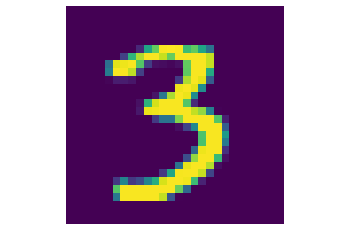

Point clouds


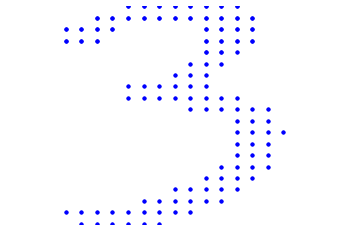

In [2]:
# Visually check the generated point clouds.
import matplotlib.pyplot as plt
data_mnist_dir = 'data' # directory saving raw MNIST image data.
data_mnistpts_dir = 'data_dump' # directory saving point cloud.
from utils.mnist_helper import load_mnist, load_mnistpts

def vis_pts(pts):
    pts = pts.astype(np.float32)
    pts_x_max = np.max(pts[:,0])
    pts_x_min = np.min(pts[:,0])
    pts_y_max = np.max(pts[:,1])
    pts_y_min = np.min(pts[:,1])
    pts[:,0] = (pts[:,0]-pts_x_min)/(pts_x_max-pts_x_min)
    pts[:,1] = (pts[:,1]-pts_y_min)/(pts_y_max-pts_y_min)
    plt.plot(pts[:, 0], pts[:, 1], ".b")
    plt.axis('equal')
    plt.axis("off")
    plt.xlim(0, 1) 
    plt.ylim(0, 1)
    plt.show()
    plt.close()

def vis_img(img):
    plt.axis('equal')
    plt.axis("off")
    plt.imshow(img)
    plt.show()
    plt.close()

img_list, labels = load_mnist(data_mnist_dir, mode='train')
pts_list, labels = load_mnistpts(data_mnistpts_dir, mode='train')

idx_to_show = 10000

# show image
print('Image')
vis_img(img_list[idx_to_show])
print('Point clouds')
# show point clouds
vis_pts(pts_list[idx_to_show])


In [3]:
## Get dataloader
from get_dataloader import get_dataloader
from get_config import get_config

config = get_config()

# Get data loaders from your implementation
loader_tr, loader_va = get_dataloader(config, mode='train')
loader_te = get_dataloader(config, mode='test')[0]
# set a smaller batch size for single batch dataset
import copy
config_single_batch = copy.copy(config)
config_single_batch.batch_size = 4
config_single_batch.random_sample = False
loader_single_batch = get_dataloader(config_single_batch, mode='single_batch')[0]

# Info of dataset to check that we did everything correctly.
data = next(iter(loader_tr))
for k, v in data.items():
    print(f"key: ({type(k)}), {k}, value: ({type(v)}, dtype {v.dtype}), {v.shape}")

loading train datasets.
Number of training samples: 48000
Number of valid samples: 12000
loading test datasets.
Number of test samples: 10000
loading train datasets.
Number of single batch samples: 4
key: (<class 'str'>), pc, value: (<class 'torch.Tensor'>, dtype torch.float32), torch.Size([256, 256, 2])
key: (<class 'str'>), label, value: (<class 'torch.Tensor'>, dtype torch.int64), torch.Size([256])


## Model (15 pts)
Implement a very simple network composed of fully connected layers (FCNet) in `get_model.py`. Note the example output below, which shows the architecture. Note that your model should change according to how you set the configuration, and how you call the network class.

In [4]:
from get_model import get_model
model = get_model(config)
print(model)

initializing weights in Linear
initializing weights in Linear
initializing weights in Linear
FcNet(
  (net): Sequential(
    (Linear-0): Linear(in_features=512, out_features=128, bias=True)
    (ReLU-0): ReLU(inplace=True)
    (Linear-1): Linear(in_features=128, out_features=128, bias=True)
    (ReLU-1): ReLU(inplace=True)
    (output): Linear(in_features=128, out_features=10, bias=True)
  )
)


# Overfitting on a single batch (15 pts)
For modern deep learning pipeline, it will always run if there is no syntax error. Thus it is a good idea to check if your network can be overfitted into a single sample or batch before moving on to the entire dataset. 
We now train our model on a single batch. Implement the `plot_log` function in  `network.py` so that we can easily visualize within the notebook.

#### You should achieve 100 percent accuracy before moving to next part.

initializing weights in Linear
initializing weights in Linear
initializing weights in Linear
Epoch:   0, loss_avg: 2.37430, val OA: 0.50000, best val OA: 0.50000
Epoch:   1, loss_avg: 2.20876, val OA: 1.00000, best val OA: 1.00000
Epoch:   2, loss_avg: 2.06999, val OA: 1.00000, best val OA: 1.00000
Epoch:   3, loss_avg: 1.94554, val OA: 1.00000, best val OA: 1.00000
Epoch:   4, loss_avg: 1.81855, val OA: 1.00000, best val OA: 1.00000
Epoch:   5, loss_avg: 1.67732, val OA: 1.00000, best val OA: 1.00000
Epoch:   6, loss_avg: 1.52083, val OA: 1.00000, best val OA: 1.00000
Epoch:   7, loss_avg: 1.35007, val OA: 1.00000, best val OA: 1.00000
Epoch:   8, loss_avg: 1.17173, val OA: 1.00000, best val OA: 1.00000
Epoch:   9, loss_avg: 0.99210, val OA: 1.00000, best val OA: 1.00000
Epoch:  10, loss_avg: 0.81857, val OA: 1.00000, best val OA: 1.00000
Epoch:  11, loss_avg: 0.65776, val OA: 1.00000, best val OA: 1.00000
Epoch:  12, loss_avg: 0.51486, val OA: 1.00000, best val OA: 1.00000
Epoch:  13

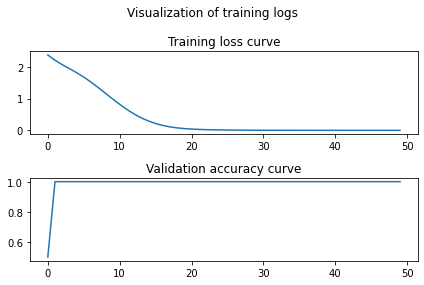

Overfit OA: 1.0


In [8]:
from network import Network
model = get_model(config)
net = Network(model, config_single_batch) 

# Training and validation
net.train(loader_single_batch,loader_single_batch)
net.plot_log()

# Testing on same subset.
oa = net.test(loader_single_batch, loader_single_batch)
print(f'Overfit OA: {oa.item()}')

# Tuning your network (20 pts)
Congrates! You manage to fit your network to a single batch. Now you can tune all the things to improve your network performance. You may change the initialization method, apply some tricks on data preprocessing, try differnet learning rate, or simply increase your network capacity. Basically, you can do anything except sorting the pointcloud (see next question) or using PyTorch default initialization method (if you do not manually initialize weights, PyTorch will initialize it for you using a default method). **Please write down all the things you did to improve the performance in the cell below**
### The marking for this part is based on your network performance (you can train your network up to 50 epoches): score = min(20,max(OA*100-15,0))

## Write down things you did to improve performace in this cell:
**YOUR ANSWER HERE**

initializing weights in Linear
initializing weights in Linear
initializing weights in Linear
Epoch:   0, loss_avg: 2.25906, val OA: 0.16367, best val OA: 0.16367
Epoch:   1, loss_avg: 2.18836, val OA: 0.20917, best val OA: 0.20917
Epoch:   2, loss_avg: 2.05828, val OA: 0.25333, best val OA: 0.25333
Epoch:   3, loss_avg: 1.97945, val OA: 0.27133, best val OA: 0.27133
Epoch:   4, loss_avg: 1.94194, val OA: 0.28692, best val OA: 0.28692
Epoch:   5, loss_avg: 1.92051, val OA: 0.29400, best val OA: 0.29400
Epoch:   6, loss_avg: 1.90091, val OA: 0.29867, best val OA: 0.29867
Epoch:   7, loss_avg: 1.88912, val OA: 0.30808, best val OA: 0.30808
Epoch:   8, loss_avg: 1.87748, val OA: 0.31708, best val OA: 0.31708
Epoch:   9, loss_avg: 1.86659, val OA: 0.31308, best val OA: 0.31708
Epoch:  10, loss_avg: 1.85636, val OA: 0.31525, best val OA: 0.31708
Epoch:  11, loss_avg: 1.84671, val OA: 0.32283, best val OA: 0.32283
Epoch:  12, loss_avg: 1.83120, val OA: 0.33083, best val OA: 0.33083
Epoch:  13

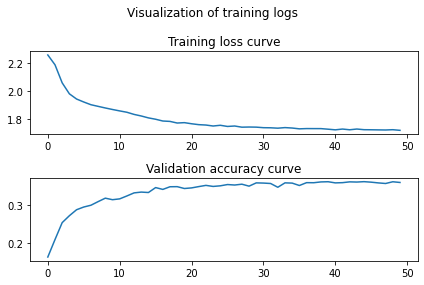

restoring logs/best_model.pth
Test OA: 0.3675000071525574


In [6]:
from network import Network

model = get_model(config)
net = Network(model, config) 

# Training on train and validation set.
net.train(loader_tr, loader_va)
net.plot_log()

# Testing on test set.
oa = net.test(loader_te)
print(f'Test OA: {oa.item()}')


## Unordered nature of point clouds (20pts)
We can improve the model by turning on the ordering option in our network configuration. Implement this ordering option, where we order the points along the x axis (10 Pts); see `get_model.py`. Also provide an explanation on why this could be the case (10 Pts -- **last cell of this notebook**).

initializing weights in Linear
initializing weights in Linear
initializing weights in Linear
Epoch:   0, loss_avg: 1.38893, val OA: 0.63383, best val OA: 0.63383
Epoch:   1, loss_avg: 0.93916, val OA: 0.71250, best val OA: 0.71250
Epoch:   2, loss_avg: 0.78727, val OA: 0.73417, best val OA: 0.73417
Epoch:   3, loss_avg: 0.69519, val OA: 0.76958, best val OA: 0.76958
Epoch:   4, loss_avg: 0.62922, val OA: 0.78275, best val OA: 0.78275
Epoch:   5, loss_avg: 0.58353, val OA: 0.80292, best val OA: 0.80292
Epoch:   6, loss_avg: 0.54766, val OA: 0.81267, best val OA: 0.81267
Epoch:   7, loss_avg: 0.52387, val OA: 0.82550, best val OA: 0.82550
Epoch:   8, loss_avg: 0.50415, val OA: 0.81842, best val OA: 0.82550
Epoch:   9, loss_avg: 0.48218, val OA: 0.83250, best val OA: 0.83250
Epoch:  10, loss_avg: 0.46814, val OA: 0.83850, best val OA: 0.83850
Epoch:  11, loss_avg: 0.45582, val OA: 0.83358, best val OA: 0.83850
Epoch:  12, loss_avg: 0.44533, val OA: 0.83783, best val OA: 0.83850
Epoch:  13

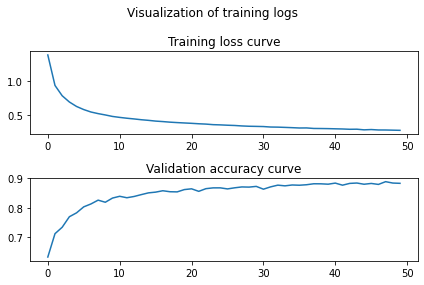

restoring logs/best_model.pth
Test OA: 0.8889999985694885


In [7]:
from network import Network
config.order_pts = True # Ordering points by setting this flag as True.
model = get_model(config)
net = Network(model, config) 

# Training on train and validation set.
net.train(loader_tr, loader_va)
net.plot_log()

# Testing on test set.
oa = net.test(loader_te)
print(f'Test OA: {oa.item()}')

## Why ordering?

**YOUR ANSWER HERE**